In [1]:
import pandas as pd

In [2]:
# Replace the file path with your actual path if running locally
df = pd.read_csv('RentingOutofFlats2025.csv')

# Display the first few rows
print(df.head())

  rent_approval_date        town block       street_name flat_type  \
0            2021-01  ANG MO KIO   105  ANG MO KIO AVE 4    4-ROOM   
1            2021-01  ANG MO KIO   107  ANG MO KIO AVE 4    3-ROOM   
2            2021-01  ANG MO KIO   108  ANG MO KIO AVE 4    3-ROOM   
3            2021-01  ANG MO KIO   111  ANG MO KIO AVE 4    5-ROOM   
4            2021-01  ANG MO KIO   111  ANG MO KIO AVE 4    5-ROOM   

   monthly_rent  
0          2000  
1          1750  
2          1750  
3          2230  
4          2450  


In [20]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'TENGAH'], dtype=object)

In [7]:
bedok_streets = df[df['street_name'].str.startswith('BEDOK', na=False)]

# Print the unique Bedok street names
print(bedok_streets['street_name'].unique())

['BEDOK STH AVE 1' 'BEDOK STH AVE 2' 'BEDOK STH RD' 'BEDOK STH AVE 3'
 'BEDOK NTH RD' 'BEDOK NTH AVE 4' 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 2'
 'BEDOK NTH AVE 3' 'BEDOK NTH ST 1' 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 1'
 'BEDOK NTH ST 3' 'BEDOK RESERVOIR VIEW' 'BEDOK NTH ST 4' 'BEDOK CTRL'
 'BEDOK RESERVOIR CRES' 'BEDOK NTH DR']


In [14]:
filtered_df = df[
    (df['street_name'] == 'BEDOK RESERVOIR VIEW') &
    (df['flat_type'] == '4-ROOM') &
    (df['block'] == '774')
]

# Display the filtered records
filtered_df.count()

rent_approval_date    17
town                  17
block                 17
street_name           17
flat_type             17
monthly_rent          17
dtype: int64

In [15]:
filtered_df

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
350,2021-01,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,2700
351,2021-01,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,1900
13401,2021-05,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,2100
26687,2021-09,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,2050
32968,2021-11,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,2300
48606,2022-04,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,2500
70024,2022-12,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,3800
75497,2023-02,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,2500
91229,2023-07,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,4000
100402,2023-10,BEDOK,774,BEDOK RESERVOIR VIEW,4-ROOM,2750


In [12]:
filtered_df.to_csv("bedok_reservoir_view_hdb_rent.csv")

In [13]:
filtered_df.describe()

,monthly_rent
count,188.000000
mean,2867.287234
std,684.384913
min,1000.000000
25%,2300.000000
50%,2800.000000
75%,3500.000000
max,4700.000000


Matplotlib is building the font cache; this may take a moment.
/var/folders/br/npl2634n5q909zfbw5fj44s40000gp/T/ipykernel_13823/2215392692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rent_approval_date'] = pd.to_datetime(filtered_df['rent_approval_date'])


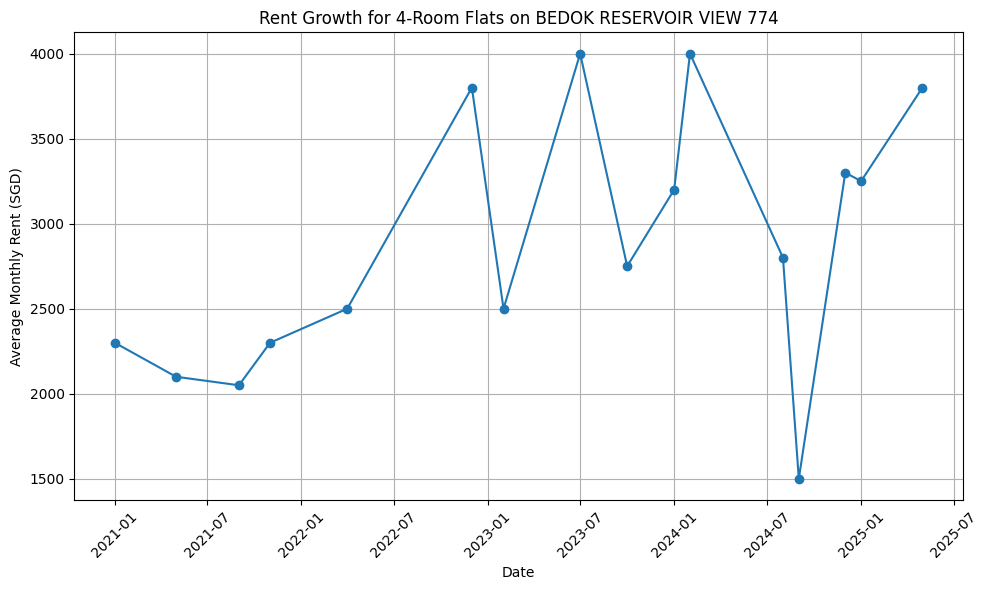

In [17]:
import matplotlib.pyplot as plt

# Convert rent_approval_date to datetime
filtered_df['rent_approval_date'] = pd.to_datetime(filtered_df['rent_approval_date'])

# Group by month and get average rent
monthly_avg_rent = filtered_df.groupby(filtered_df['rent_approval_date'].dt.to_period('M'))['monthly_rent'].mean().reset_index()
monthly_avg_rent['rent_approval_date'] = monthly_avg_rent['rent_approval_date'].dt.to_timestamp()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_rent['rent_approval_date'], monthly_avg_rent['monthly_rent'], marker='o')
plt.title('Rent Growth for 4-Room Flats on BEDOK RESERVOIR VIEW 774')
plt.xlabel('Date')
plt.ylabel('Average Monthly Rent (SGD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/br/npl2634n5q909zfbw5fj44s40000gp/T/ipykernel_13823/1840585605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['rent_approval_date'] = pd.to_datetime(filtered_df2['rent_approval_date'])


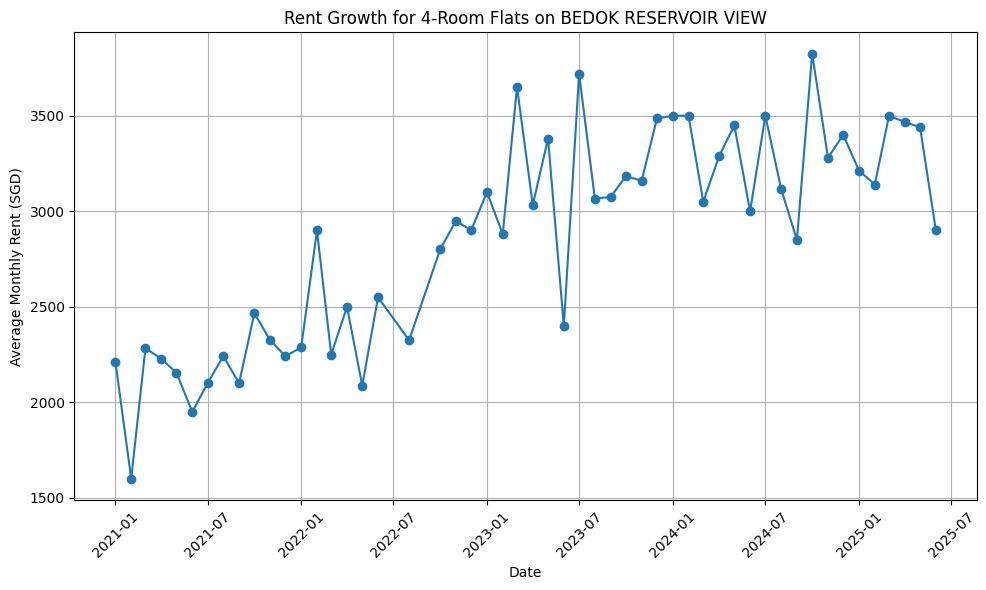

In [19]:
filtered_df2 = df[
    (df['street_name'] == 'BEDOK RESERVOIR VIEW') &
    (df['flat_type'] == '4-ROOM')
]

# Convert rent_approval_date to datetime
filtered_df2['rent_approval_date'] = pd.to_datetime(filtered_df2['rent_approval_date'])

# Group by month and get average rent
monthly_avg_rent = filtered_df2.groupby(filtered_df2['rent_approval_date'].dt.to_period('M'))['monthly_rent'].mean().reset_index()
monthly_avg_rent['rent_approval_date'] = monthly_avg_rent['rent_approval_date'].dt.to_timestamp()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_rent['rent_approval_date'], monthly_avg_rent['monthly_rent'], marker='o')
plt.title('Rent Growth for 4-Room Flats on BEDOK RESERVOIR VIEW')
plt.xlabel('Date')
plt.ylabel('Average Monthly Rent (SGD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
filtered_df3 = df[
    (df['town'] == 'TAMPINES') &
    (df['flat_type'] == '4-ROOM')
]

filtered_df3.to_csv("tampines_4room_rent.csv")